<a href="https://colab.research.google.com/github/hanyeh00/recap-my-projects/blob/master/XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](*italicized text* 
)
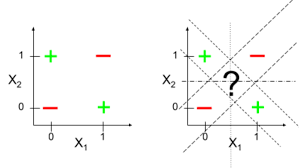


معماری شبکه :
###input layer= X
###hidden layer=h
###activation function is nonlinear Relu
###loss function=MSE

#### perceptron is a simple neural network

#### برخی پرسپترون را معادل با نورون مصنوعی امروزی معرفی می‌کنند--> دقیق نیست. برخی دیگر پرسپترون را** تابع فعالسازی** معرفی کرده‌اند!!! که غلط اندر غلط است



> 
فرانک روزنبلات مقاله‌ای با عنوان «THE PERCEPTRON: A PROBABILISTIC MODEL FOR INFORMATION STORAGE AND ORGANIZATION IN THE BRAIN »

> 



  او در این مقاله عنوان کرد که 
  **جبر بولی**
   زبان مناسبی برای تحقیق در حوزه شبکه‌های عصبی نیست و بهتر است 

از **تئوری احتمال** استفاده شود. 

او یک شبکه عصبی جدید به نام

 perceptron 
 ارائه کرد .

In [74]:
#@title import
import time
import keras
import numpy as np


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


[[0.5040612 ]
 [0.4489505 ]
 [0.5059895 ]
 [0.43951982]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Unrecognized location 'upper rigt'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


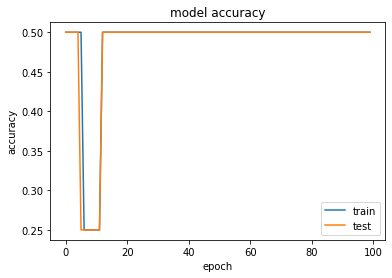

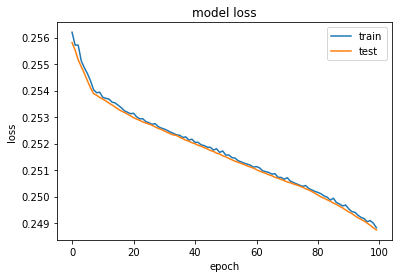

In [73]:

# Activation RELU + sigmoid for binary classification output + MSE loss function
# For better result with binary classifier, use cross entropy with a sigmoid
#    loss = nn.sigmoid_cross_entropy_with_logits(logits=y_estimated, labels=Y)

# A naïve direct implementation of the loss function
#     n_instances = X.get_shape().as_list()[0]
#     loss = reduce_sum(pow(y_estimated - Y, 2))/ n_instances

# In case of problem with gradient (exploding or vanishing gradient)perform gradient clipping
#     n_instances = X.get_shape().as_list()[0]
#     loss = tf.reduce_sum(pow(clip_by_value(y_estimated,1e-10,1.0) - Y,2))/(n_instances)

X = np.array([[0,0],[0,1],[1,0],[1,1]])# input
y=np.array([[0],[1],[1],[0]])# output
test_x=np.array([[0,0],[1,0],[0,1],[1,1]])
test_y=np.array([[0],[1],[1],[0]])
model=keras.models.Sequential()
model.add(keras.layers.Dense(2,input_dim=2,activation='tanh'))
model.add(keras.layers.Dense(4, activation="relu"))
model.add(keras.layers.Dense(1, activation='sigmoid'))
#train
model.compile(optimizer='adam',loss='MSE',metrics=['accuracy'])
history=model.fit(X,y,batch_size=1,epochs=100,verbose=0,validation_data = (test_x,test_y))#دراز نویسی را پاک میکند وربوس
print(model.predict_proba(X))
#test
test_value=model.predict_classes(test_x)
if test_value[0]==test_y[0]:
  print("Output of XOR is True %s")

#W = tf.Variable(tf.truncated_normal([2,2]), name = "W")# در شبکه های cnn‌ در هنگام تعریف فیلتر ها» مقادیر وزنها را رندم و معمولا از تابع truncated_normal با میانگین صفر و واریانس 0.1 استفاده می شود. توزیع نرمال

#plot 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper rigt')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper right')
#plt.show()